# Computer Simulations Project

**Group Members: ICS 4A & 4B**
- 102262 - George Kimutai Ruto - EDA (Exploratory Data Analysis)
- 100088 - Reagan Ogonda Ouma - Visualization (based on Health_exp_pct_GDP_2016)
- 096539 - Rodney Bakari Wanjala - Visualization  ( based on per_capita_exp_PPP_2016)
- 101834 - Edward Orina Mwebi - KNN Modelling (preprocessing and creation of base model)
- 101485 - David Motaroki Ogaro - KNN Modelling (improving and evaluating model's performance)


In [1]:
# IMPORTING LIBRARIES THAT WILL BE USED
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
upload=files.upload() # LOADING DATA FROM OUR LOCAL MACHINE

Saving Health Systems Dataset.csv to Health Systems Dataset.csv


In [4]:
# LOADING THE WHO DATASET
health_data = pd.read_csv('Health Systems Dataset.csv')
health_data.head()

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


# EXPLORATORY DATA ANALYSIS
BY GEORGE KIMUTAI RUTO

In [5]:
# CHECKING THE NUMBER OF ROWS AND COLUMNS IN THE DATASET
health_data.shape

(210, 14)

In [6]:
# CHECKING THE COLUMN NAMES
print(health_data.columns)

Index(['Country_Region', 'Province_State', 'World_Bank_Name',
       'Health_exp_pct_GDP_2016', 'Health_exp_public_pct_2016',
       'Health_exp_out_of_pocket_pct_2016', 'Health_exp_per_capita_USD_2016',
       'per_capita_exp_PPP_2016', 'External_health_exp_pct_2016',
       'Physicians_per_1000_2009-18', 'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_1000_2008-18',
       'Completeness_of_birth_reg_2009-18',
       'Completeness_of_death_reg_2008-16'],
      dtype='object')


In [7]:
# CHECKING THE TYPE OF COLUMNS
health_data.dtypes

Country_Region                           object
Province_State                           object
World_Bank_Name                          object
Health_exp_pct_GDP_2016                 float64
Health_exp_public_pct_2016              float64
Health_exp_out_of_pocket_pct_2016       float64
Health_exp_per_capita_USD_2016          float64
per_capita_exp_PPP_2016                 float64
External_health_exp_pct_2016            float64
Physicians_per_1000_2009-18             float64
Nurse_midwife_per_1000_2009-18          float64
Specialist_surgical_per_1000_2008-18    float64
Completeness_of_birth_reg_2009-18       float64
Completeness_of_death_reg_2008-16       float64
dtype: object

### Check for null values 

In [8]:
# CHECKING FOR NULL VALUES IN THE DATASET 
health_data.isnull().sum()

Country_Region                           23
Province_State                          196
World_Bank_Name                           0
Health_exp_pct_GDP_2016                  24
Health_exp_public_pct_2016               24
Health_exp_out_of_pocket_pct_2016        24
Health_exp_per_capita_USD_2016           24
per_capita_exp_PPP_2016                  24
External_health_exp_pct_2016             43
Physicians_per_1000_2009-18              21
Nurse_midwife_per_1000_2009-18           21
Specialist_surgical_per_1000_2008-18     35
Completeness_of_birth_reg_2009-18        47
Completeness_of_death_reg_2008-16       103
dtype: int64

In [9]:
# PERCENTAGE OF NULL VALUES IN THE COLUMNS
health_data.isnull().sum() / 210 * 100

Country_Region                          10.952381
Province_State                          93.333333
World_Bank_Name                          0.000000
Health_exp_pct_GDP_2016                 11.428571
Health_exp_public_pct_2016              11.428571
Health_exp_out_of_pocket_pct_2016       11.428571
Health_exp_per_capita_USD_2016          11.428571
per_capita_exp_PPP_2016                 11.428571
External_health_exp_pct_2016            20.476190
Physicians_per_1000_2009-18             10.000000
Nurse_midwife_per_1000_2009-18          10.000000
Specialist_surgical_per_1000_2008-18    16.666667
Completeness_of_birth_reg_2009-18       22.380952
Completeness_of_death_reg_2008-16       49.047619
dtype: float64

### Dealing with the null values



**Country_Region** and **Province_State** cater for most of the null values present in the dataset. In this case, we can do away with them as **Word_Bank_Name** gives us all the countries' names.

In [10]:
# WE THEN DROP THE TWO COLUMNS: Province_State and Country_Region
health_data_df = health_data.drop(['Province_State', 'Country_Region'], axis=1)
health_data_df.head()

,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


Since **Completeness_of_death_reg_2008-16** is missing almost half of its values (49%). We can also drop the column.

In [11]:
# DROPPING THE Completeness_of_death_reg_2008-16 COLUMN
health_data_df.drop('Completeness_of_death_reg_2008-16', axis=1, inplace=True)
health_data_df.head()

,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18
0,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3
1,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4
2,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0
3,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0
4,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0


In [12]:
# CHECKING THE PERCANTAGE OF NULL VALUES IN THE REMAINING COLUMNS
health_data_df.isnull().sum() / 210 * 100

World_Bank_Name                          0.000000
Health_exp_pct_GDP_2016                 11.428571
Health_exp_public_pct_2016              11.428571
Health_exp_out_of_pocket_pct_2016       11.428571
Health_exp_per_capita_USD_2016          11.428571
per_capita_exp_PPP_2016                 11.428571
External_health_exp_pct_2016            20.476190
Physicians_per_1000_2009-18             10.000000
Nurse_midwife_per_1000_2009-18          10.000000
Specialist_surgical_per_1000_2008-18    16.666667
Completeness_of_birth_reg_2009-18       22.380952
dtype: float64

We can then replace the missing values in the remaining columns with a measure of central tendency for example the mode, median and mean. Although we first need to check the shape of their distributions in order to make a choice on which measure of central tendency to use.

Text(0.5, 1.0, 'Distribution of Completeness_of_birth_reg_2009-18')

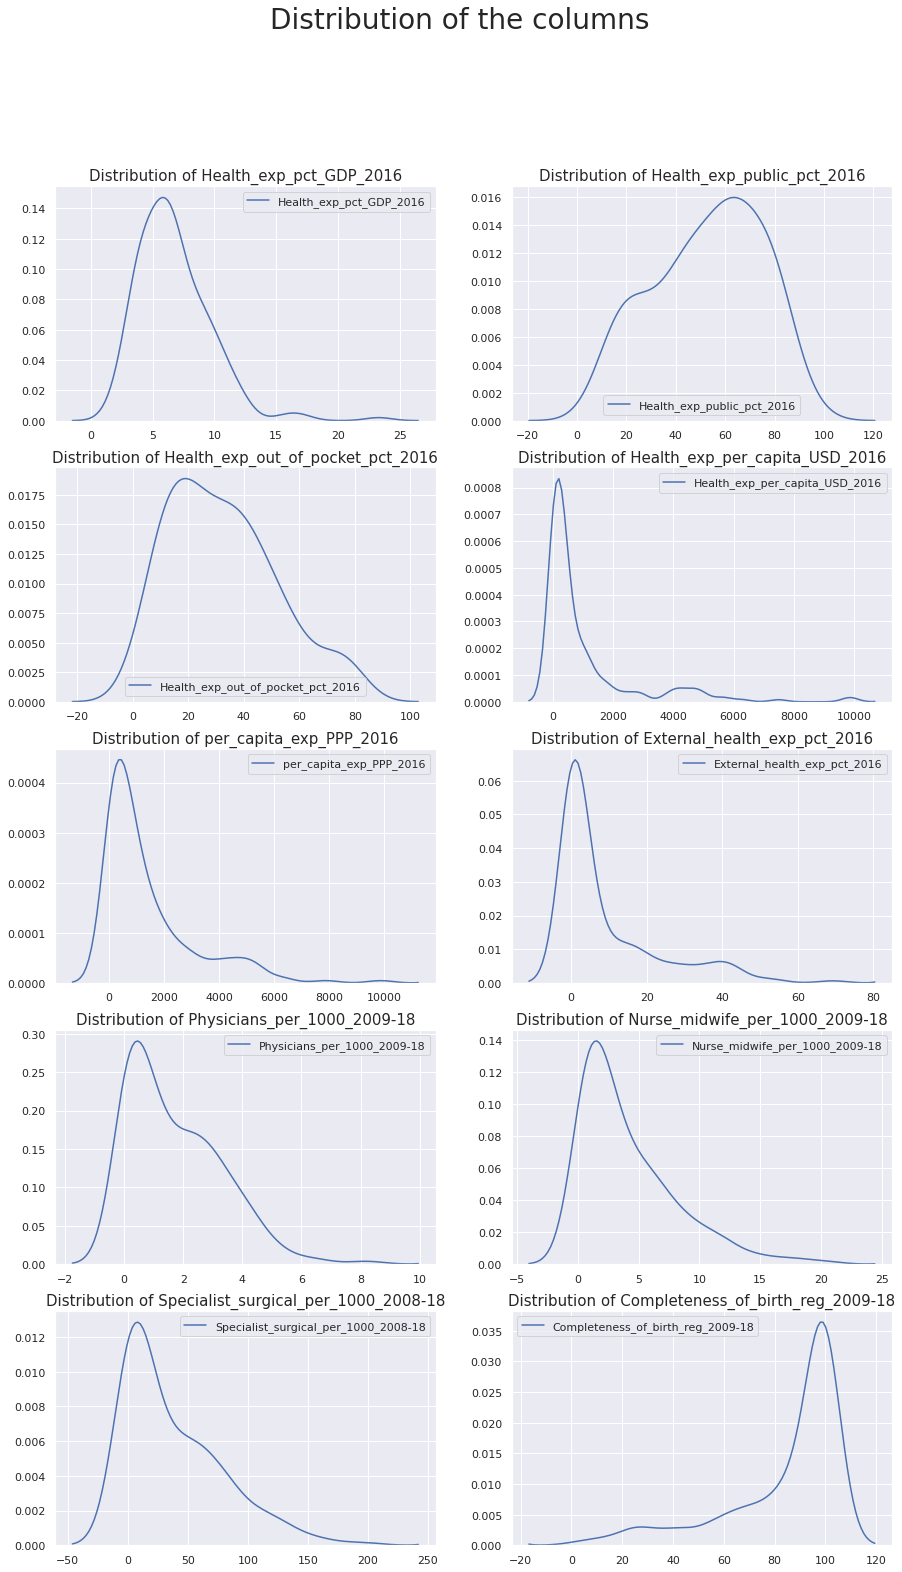

In [15]:
 # CHECKING THE SHAPE OF THE DISTRIBUTIONS
sns.set(style="darkgrid")

fig, axes = plt.subplots(5, 2, figsize=(15, 25))
fig.suptitle('Distribution of the columns' , fontsize=28)

sns.kdeplot(ax=axes[0, 0], data=health_data_df['Health_exp_pct_GDP_2016'], shade=False)
axes[0, 0].set_title('Distribution of Health_exp_pct_GDP_2016' , fontsize=15)

sns.kdeplot(ax=axes[0, 1], data=health_data_df['Health_exp_public_pct_2016'], shade=False)
axes[0, 1].set_title('Distribution of Health_exp_public_pct_2016' , fontsize=15)

sns.kdeplot(ax=axes[1, 0], data=health_data_df['Health_exp_out_of_pocket_pct_2016'], shade=False)
axes[1, 0].set_title('Distribution of Health_exp_out_of_pocket_pct_2016', fontsize=15)

sns.kdeplot(ax=axes[1, 1], data=health_data_df['Health_exp_per_capita_USD_2016'], shade=False)
axes[1, 1].set_title('Distribution of Health_exp_per_capita_USD_2016', fontsize=15)

sns.kdeplot(ax=axes[2, 0], data=health_data_df['per_capita_exp_PPP_2016'], shade=False)
axes[2, 0].set_title('Distribution of per_capita_exp_PPP_2016', fontsize=15)

sns.kdeplot(ax=axes[2, 1], data=health_data_df['External_health_exp_pct_2016'], shade=False)
axes[2, 1].set_title('Distribution of External_health_exp_pct_2016', fontsize=15)

sns.kdeplot(ax=axes[3, 0], data=health_data_df['Physicians_per_1000_2009-18'], shade=False)
axes[3, 0].set_title('Distribution of Physicians_per_1000_2009-18', fontsize=15)

sns.kdeplot(ax=axes[3, 1], data=health_data_df['Nurse_midwife_per_1000_2009-18'], shade=False)
axes[3, 1].set_title('Distribution of Nurse_midwife_per_1000_2009-18', fontsize=15)

sns.kdeplot(ax=axes[4, 0], data=health_data_df['Specialist_surgical_per_1000_2008-18'], shade=False)
axes[4, 0].set_title('Distribution of Specialist_surgical_per_1000_2008-18', fontsize=15)

sns.kdeplot(ax=axes[4, 1], data=health_data_df['Completeness_of_birth_reg_2009-18'], shade=False)
axes[4, 1].set_title('Distribution of Completeness_of_birth_reg_2009-18', fontsize=15)


Most columns as shown above are either skewed to the left or to the right, we can therefore replace the null values in those columns with their median 

In [16]:
# REPLACING THE NULL VALUES WITH THE MEDIAN OF THE COLUMN
health_data_cols = health_data_df.select_dtypes(exclude='object').columns

for column in health_data_cols:
    health_data_df[column].fillna(health_data_df[column].median(), inplace=True)

health_data_df.head()

,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18
0,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3
1,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4
2,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0
3,Andorra,10.4,49.1,41.7,3834.7,4978.7,1.7,3.3,4.0,83.1,100.0
4,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,23.6,25.0


In [17]:
# CHECKING IF THERE ARE NO NULL VALUES
health_data_df.isnull().sum()

World_Bank_Name                         0
Health_exp_pct_GDP_2016                 0
Health_exp_public_pct_2016              0
Health_exp_out_of_pocket_pct_2016       0
Health_exp_per_capita_USD_2016          0
per_capita_exp_PPP_2016                 0
External_health_exp_pct_2016            0
Physicians_per_1000_2009-18             0
Nurse_midwife_per_1000_2009-18          0
Specialist_surgical_per_1000_2008-18    0
Completeness_of_birth_reg_2009-18       0
dtype: int64

### Visualize patterns and correlations

We create a heatmap to quickly visualize patterns and correlations.

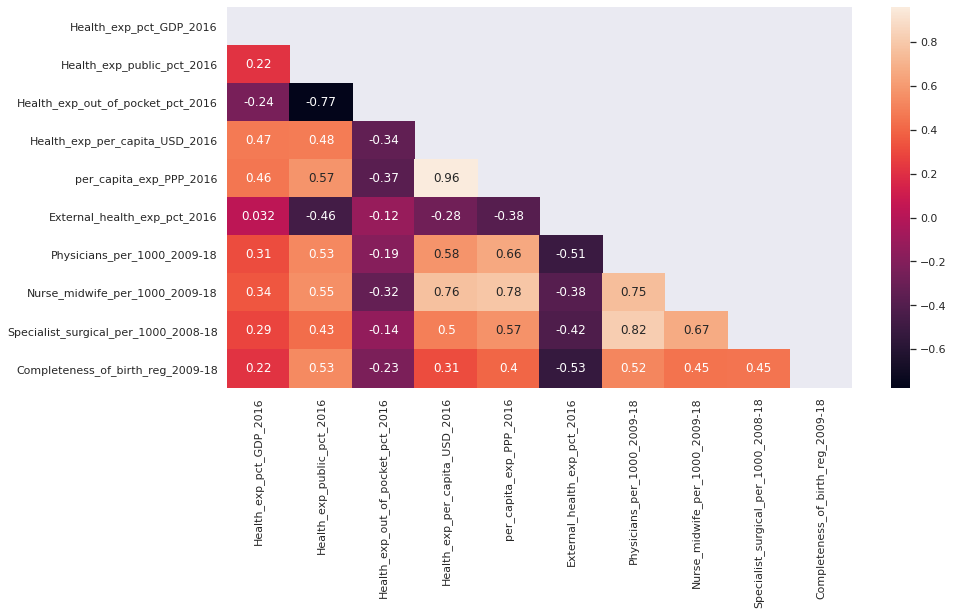

In [18]:
# CREATING THE CO-ORELATION MATRIX
corr = health_data_df.corr()

#GENERATING A MASK FOR THE UPPER TRIANGLE TO REMOVE THE REPETETIVE VALUES
mask = np.triu(np.ones_like(corr, dtype=bool))

# ADDING THE MASK TO THE HEAT-MAP
plt.figure(figsize=(14,7))
sns.heatmap(corr, mask=mask, annot=True)

Highly correlated features do not bring new information but increase complexity.

Remove one of the 2 features with a high correlation.

In [19]:
#CALCULATING THE CO-ORELATION MATRIX AND TAKING THE ABSOLUTE VALUE
corr_matrix = health_data_df.corr().abs()

#CREATING A BOOLEAN MASK AND APPYING IT
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# LISTING THE COLUMN NAMES OF HIGHLY CO-ORELATED FEATURES (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

for col in to_drop:
    print('We drop column named: ', col)

#DROPPING THE FEATURES IN THE T0_DROP LIST
health_data_df = health_data_df.drop(to_drop, axis=1)

print("\nThe reduced dataframe has {} columns.".format(health_data_df.shape[1]))
print("\nThe remaining columns are: {}".format(health_data_df.columns))

We drop column named:  Health_exp_per_capita_USD_2016

The reduced dataframe has 10 columns.

The remaining columns are: Index(['World_Bank_Name', 'Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'per_capita_exp_PPP_2016', 'External_health_exp_pct_2016',
       'Physicians_per_1000_2009-18', 'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_1000_2008-18',
       'Completeness_of_birth_reg_2009-18'],
      dtype='object')


# Visualizations

## Visualize total health expenditure as a percentage of GDP (Health_exp_pct_GDP_2016) 

#BY REAGAN OGONDA OUMA

By getting a country's total health expenditure as a percentage of their GDP, the resulting value becomes comparable across different countries.

The assumptions made:
- Countries with higher values in *Health_exp_pct_GDP_2016* spend more on health.
- Countries with lower values in *Health_exp_pct_GDP_2016* spend less on health.

In [20]:
# SORTING THE DATASET BASED ON Health_exp_pct_GDP_2016
Health_exp_pct_GDP_2016 = health_data_df.sort_values(by = 'Health_exp_pct_GDP_2016', ascending = False)
Health_exp_pct_GDP_2016.head()

,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18
118,Marshall Islands,23.3,52.6,9.0,934.4,35.4,0.5,3.5,15.9,84.0
199,United States,17.1,81.8,11.1,9869.7,0.0,2.6,8.6,54.7,100.0
163,Sierra Leone,16.5,11.2,41.6,244.0,41.0,0.0,1.0,0.1,81.0
194,Tuvalu,15.5,84.5,0.7,601.0,12.2,0.9,3.8,26.1,96.0
122,"Micronesia, Fed. Sts.",12.6,27.8,2.6,431.6,69.2,0.2,3.3,7.0,96.0


[Text(0, 0, 'Lao PDR'),
 Text(0, 0, 'Bangladesh'),
 Text(0, 0, 'Brunei Darussalam'),
 Text(0, 0, 'Papua New Guinea'),
 Text(0, 0, 'Monaco')]

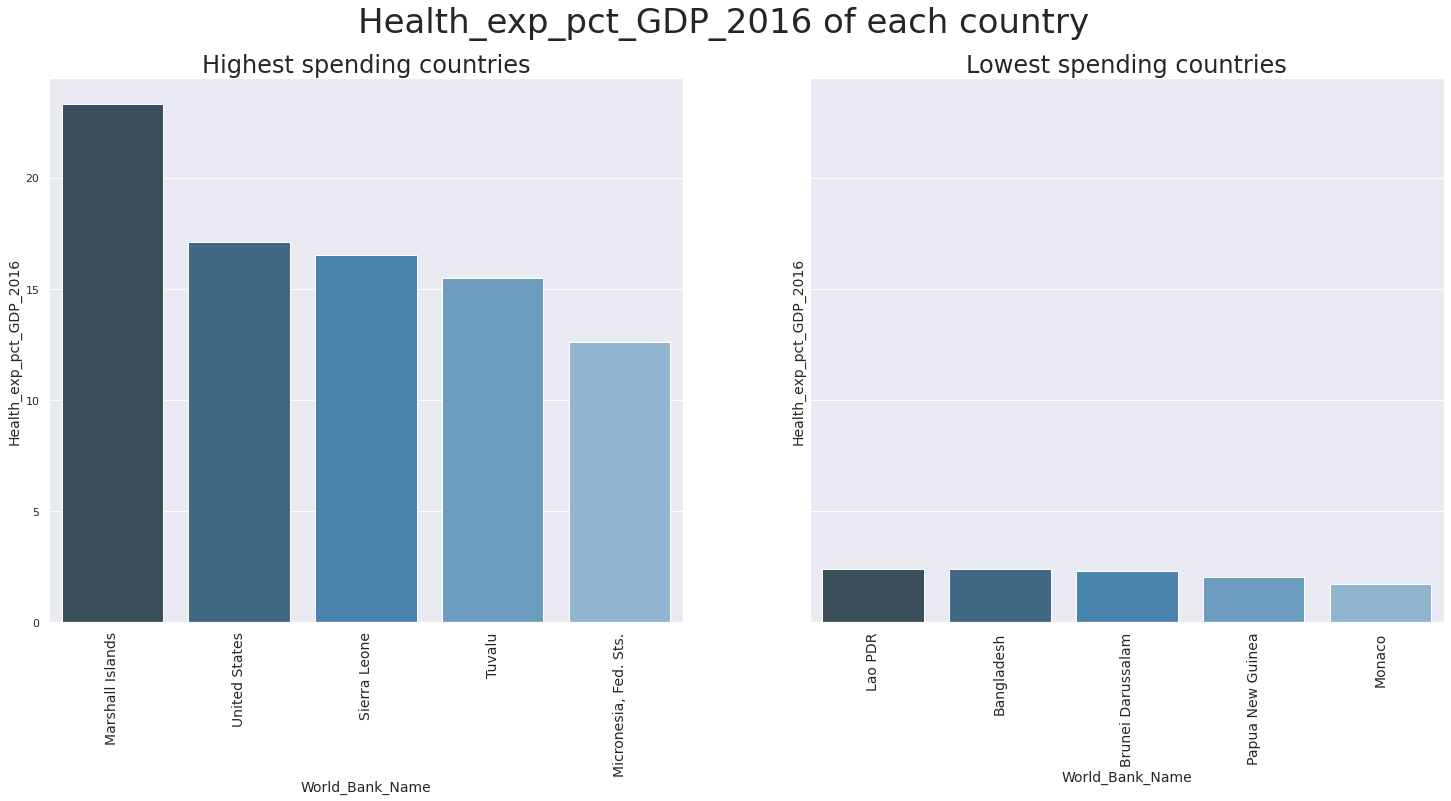

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(25,10), sharey=True)
fig.suptitle('Health_exp_pct_GDP_2016 of each country', fontsize=34)

sns.barplot(ax=axes[0], x=Health_exp_pct_GDP_2016['World_Bank_Name'].head(), y=Health_exp_pct_GDP_2016['Health_exp_pct_GDP_2016'].head(), palette="Blues_d")
axes[0].set_xlabel('World_Bank_Name', fontsize=14)
axes[0].set_ylabel('Health_exp_pct_GDP_2016', fontsize=14)
axes[0].set_title('Highest spending countries', fontsize=24)
axes[0].set_xticklabels(Health_exp_pct_GDP_2016['World_Bank_Name'].head(), fontsize=14, rotation=90)

sns.barplot(ax=axes[1], x=Health_exp_pct_GDP_2016['World_Bank_Name'].tail(), y=Health_exp_pct_GDP_2016['Health_exp_pct_GDP_2016'].tail(), palette="Blues_d")
axes[1].set_xlabel('World_Bank_Name', fontsize=14)
axes[1].set_ylabel('Health_exp_pct_GDP_2016', fontsize=14)
axes[1].set_title('Lowest spending countries', fontsize=24)
axes[1].set_xticklabels(Health_exp_pct_GDP_2016['World_Bank_Name'].tail(), fontsize=14, rotation=90)

### FROM THE ABOVE WE CAN CONCLUDE THAT THE:

**Highest spenders on health care (as a percentage of their GDP):**
-  Marshall Islands
- United States
- Sierra Leone
- Tuvalu
- Micronesia. Fed. Sts
    
**Lowest spenders on health care (as a percentage of their GDP):**
- Lao PDR
- Bangladesh
- Brunei Darussalam
- Papua New Guinea 
- Monaco

### Visualizing who spends the money

There are three modes of spending the money on healthcare. 
The government, the out of pocket individuals and the external sources.

Does government spend more? or is it out of pocket expenditure? or external?

In [22]:
# GETTING Health_exp_public_pct_2016, Health_exp_out_of_pocket_pct_2016 and External_health_exp_pct_2016 AS A PERCENTAGE OF THE GDP 
Health_exp_pct_GDP = pd.DataFrame()

Health_exp_pct_GDP['Health_exp_public_pct_GDP'] =  (Health_exp_pct_GDP_2016['Health_exp_public_pct_2016'] * Health_exp_pct_GDP_2016['Health_exp_pct_GDP_2016']) / 100

Health_exp_pct_GDP['Health_exp_out_of_pocket_pct_GDP'] = (Health_exp_pct_GDP_2016['Health_exp_out_of_pocket_pct_2016'] * Health_exp_pct_GDP_2016['Health_exp_pct_GDP_2016']) / 100

Health_exp_pct_GDP['External_health_exp_pct_GDP'] = (Health_exp_pct_GDP_2016['External_health_exp_pct_2016'] * Health_exp_pct_GDP_2016['Health_exp_pct_GDP_2016']) / 100

Health_exp_pct_GDP.head()

,Health_exp_public_pct_GDP,Health_exp_out_of_pocket_pct_GDP,External_health_exp_pct_GDP
118,12.2558,2.0970,8.2482
199,13.9878,1.8981,0.0000
163,1.8480,6.8640,6.7650
194,13.0975,0.1085,1.8910
122,3.5028,0.3276,8.7192


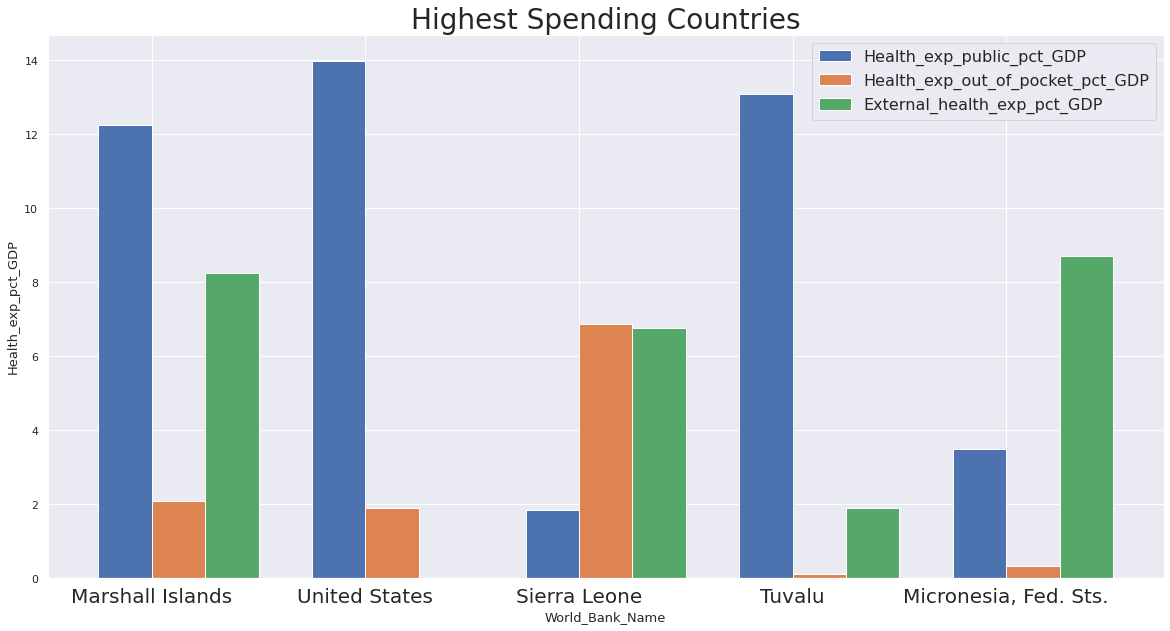

In [23]:
# NUMBERS OF PAIRS OF BARS
N = 5

# DATA ON THE X-AXIS

# SPECIFYING THE VALUES ON THE BLUES BARS (height)
blue_bar = Health_exp_pct_GDP['Health_exp_public_pct_GDP'].head()

# SPECIFYING THE VALUES ON THE ORANGE BARS (height)
orange_bar = Health_exp_pct_GDP['Health_exp_out_of_pocket_pct_GDP'].head()

# SPECIFYING THE VALUES ON THE GREEN BARS (height)
green_bar = Health_exp_pct_GDP['External_health_exp_pct_GDP'].head()

# POSITION OF THE BARS ON THE X-AXIS
ind = np.arange(N)

# FIGURE SIZE
plt.figure(figsize=(20,10))

# WIDTH OF A SINGLE BAR
width = 0.25       

# PLOTTING THE GRAPH
plt.bar(ind, blue_bar , width, label='Health_exp_public_pct_GDP')
plt.bar(ind + width, orange_bar, width, label='Health_exp_out_of_pocket_pct_GDP')
plt.bar(ind + width + width, green_bar, width, label='External_health_exp_pct_GDP')

plt.xlabel('World_Bank_Name', fontsize=13)
plt.ylabel('Health_exp_pct_GDP', fontsize=13)
plt.title('Highest Spending Countries', fontsize=28)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, Health_exp_pct_GDP_2016['World_Bank_Name'].head(), fontsize=20)

# FINDING THE BEST POSISTION FOR LEGENDS AND PLACING IT
plt.legend(loc='best', prop={'size': 16})
plt.show()

### Conclusion (Who spends on healthcare in Highest spending countries?)

Among the Highest spenders on Healthcare (as a percentage of their GDP), we note that 3 out of 5 have their health expenditures funded from domestic public sources (**Health_exp_public_pct_GDP**).

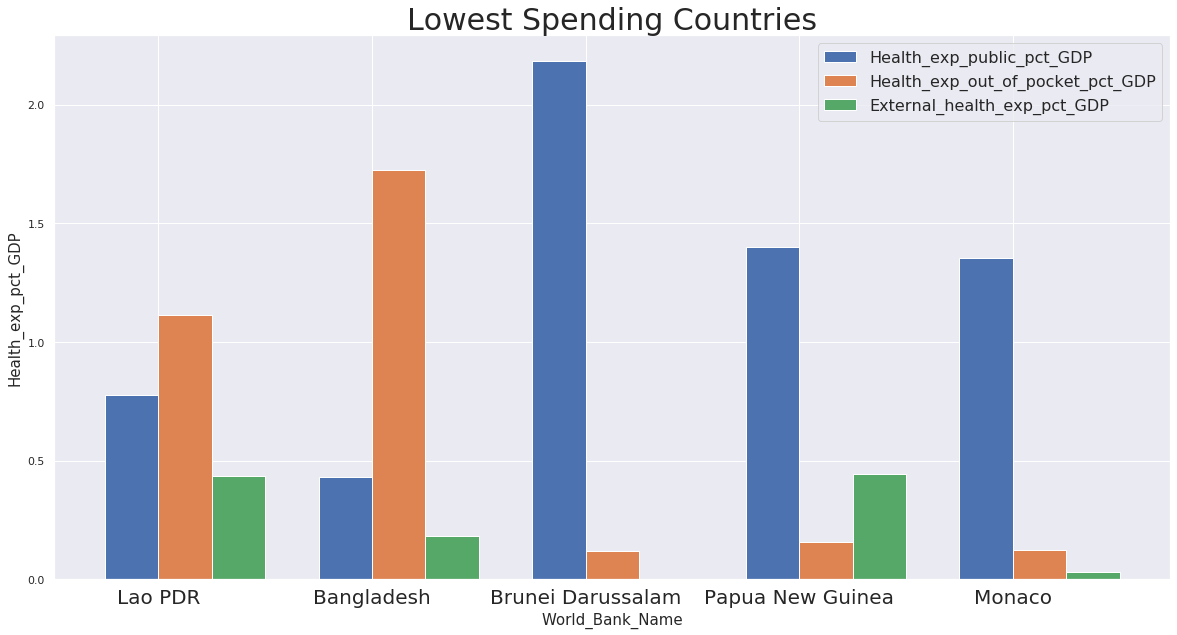

In [ ]:
# NUMBERS OF PAIRS OF BARS WE WANT TO PLOT
N = 5

# DATA ON X-AXIS

# SPECIFYING THE VALUES OF BLUE BARS (height)
blue_bar = Health_exp_pct_GDP['Health_exp_public_pct_GDP'].tail()

# SPECIFYING THE VALUES OF ORANGE BARS (height)
orange_bar = Health_exp_pct_GDP['Health_exp_out_of_pocket_pct_GDP'].tail()

# SPECIFYING THE VALUES OF GREEN BARS (height)
green_bar = Health_exp_pct_GDP['External_health_exp_pct_GDP'].tail()

# POSITION OF THE BARS IN X-AXIS
ind = np.arange(N)

# FIGURE SIZE
plt.figure(figsize=(20,10))

# WIDTH OF A SINGLE BAR 
width = 0.25       

# PLOTTING THE GRAPH
plt.bar(ind, blue_bar , width, label='Health_exp_public_pct_GDP')
plt.bar(ind + width, orange_bar, width, label='Health_exp_out_of_pocket_pct_GDP')
plt.bar(ind + width + width, green_bar, width, label='External_health_exp_pct_GDP')

plt.xlabel('World_Bank_Name', fontsize=15)
plt.ylabel('Health_exp_pct_GDP', fontsize=15)
plt.title('Lowest Spending Countries', fontsize=30)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, Health_exp_pct_GDP_2016['World_Bank_Name'].tail(), fontsize=20)

# FINDING THE BEST POSISTION FOR LEGENDS AND PLACING IT
plt.legend(loc='best', prop={'size': 16})
plt.show()

### Conclusions (Who spends on healthcare in Lowest spending countries?)

Among the Lowest spenders on Healthcare (as a percentage of their GDP), we note that 3 out of 5 have their health expenditures funded from domestic public sources (**Health_exp_public_pct_GDP**).

### General Conclusions

We can make an assumption that in most countries, health expenditures are mainly funded from domestic public sources (**Health_exp_public_pct_GDP**).

## Visualize average amount of money spent on health by each citizen (per_capita_exp_PPP_2016)

# RODNEY WANJALA BAKARI 

Purchasing Power Parity ensures the per capita expenditure in health care is comparable between different countries.

Per capita expenditure in USD may be misleading since the currency may be manipulated. Additionally, using GDP calculated in a Norminal way rather than PPP would also be misleading due to the manipulation of currency also.

The assumptions made:
- Countries with higher values in *per_capita_exp_PPP_2016* column spend more on health.
- Countries with lower values in *per_capita_exp_PPP_2016* column spend less on health.

In [24]:
# SORTING THE DATASET BASED ON Health_exp_pct_GDP_2016
per_capita_exp_PPP_2016 = health_data_df.sort_values(by = 'per_capita_exp_PPP_2016', ascending = False)
per_capita_exp_PPP_2016.head()

,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18
199,United States,17.1,81.8,11.1,9869.7,0.0,2.6,8.6,54.7,100.0
181,Switzerland,12.2,62.8,29.6,7867.4,1.7,4.2,17.3,94.8,100.0
111,Luxembourg,6.2,81.2,11.2,6374.2,1.2,3.0,12.3,80.8,100.0
140,Norway,10.5,85.1,14.5,6203.5,0.0,4.6,18.1,67.2,100.0
70,Germany,11.1,84.7,12.4,5463.3,1.7,4.2,13.2,108.0,100.0


[Text(0, 0, 'Niger'),
 Text(0, 0, 'Eritrea'),
 Text(0, 0, 'Burundi'),
 Text(0, 0, 'Congo, Dem. Rep.'),
 Text(0, 0, 'Central African Republic')]

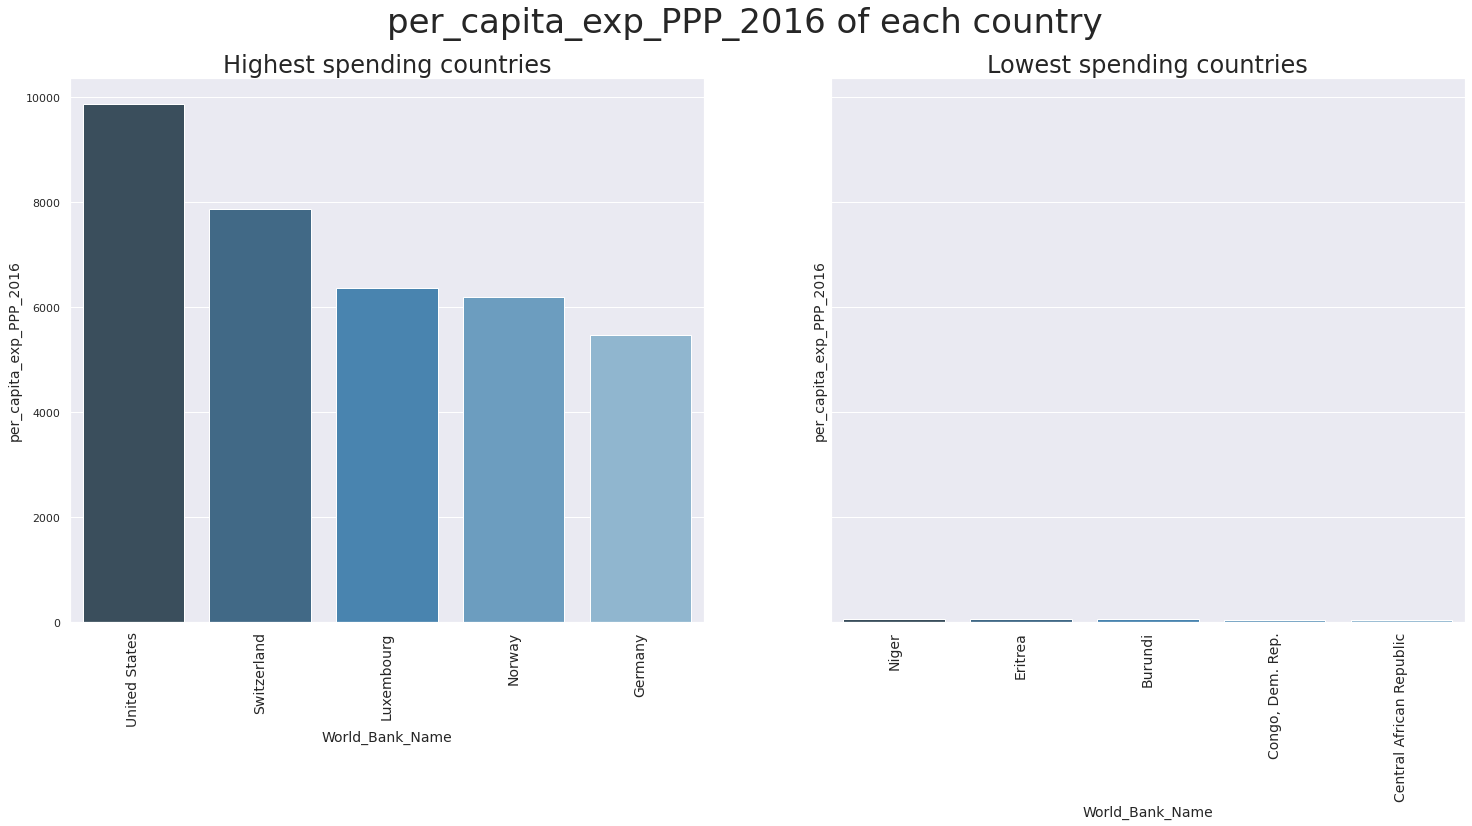

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(25,10), sharey=True)
fig.suptitle('per_capita_exp_PPP_2016 of each country', fontsize=34)

sns.barplot(ax=axes[0], x=per_capita_exp_PPP_2016['World_Bank_Name'].head(), y=per_capita_exp_PPP_2016['per_capita_exp_PPP_2016'].head(), palette="Blues_d")
axes[0].set_xlabel('World_Bank_Name', fontsize=14)
axes[0].set_ylabel('per_capita_exp_PPP_2016', fontsize=14)
axes[0].set_title('Highest spending countries', fontsize=24)
axes[0].set_xticklabels(per_capita_exp_PPP_2016['World_Bank_Name'].head(), fontsize=14, rotation=90)

sns.barplot(ax=axes[1], x=per_capita_exp_PPP_2016['World_Bank_Name'].tail(), y=per_capita_exp_PPP_2016['per_capita_exp_PPP_2016'].tail(), palette="Blues_d")
axes[1].set_xlabel('World_Bank_Name', fontsize=14)
axes[1].set_ylabel('per_capita_exp_PPP_2016', fontsize=14)
axes[1].set_title('Lowest spending countries', fontsize=24)
axes[1].set_xticklabels(per_capita_exp_PPP_2016['World_Bank_Name'].tail(), fontsize=14, rotation=90)

### FROM THE ABOVE WE CAN CONLCUDE THAT THE:

**Highest spenders on health care (per_capita_exp_PPP_2016):**
- United States
- Switzerland
- Luxembourg
- Norway
- Gemany
    
**Lowest spenders on health care (per_capita_exp_PPP_2016):**
- Niger
- Eritrea
- Burundi
- Congo, Dem. Rep.
- Central African Republic

Only United States appeared in both conclusions. 

### Visualizing who spends the money

There are three modes of spending the money on healthcare. 
The government, the out of pocket individuals and the external sources.

Does government spend more? or is it out of pocket expenditure? or external?

In [26]:
# GETTING Health_exp_public_pct_2016, Health_exp_out_of_pocket_pct_2016 and External_health_exp_pct_2016 AS A PERCENTAGE OF THE GDP 
Health_exp_pct_GDP = pd.DataFrame()

Health_exp_pct_GDP['Health_exp_public_pct_GDP'] =  (per_capita_exp_PPP_2016['Health_exp_public_pct_2016'] * per_capita_exp_PPP_2016['Health_exp_pct_GDP_2016']) / 100

Health_exp_pct_GDP['Health_exp_out_of_pocket_pct_GDP'] = (per_capita_exp_PPP_2016['Health_exp_out_of_pocket_pct_2016'] * per_capita_exp_PPP_2016['Health_exp_pct_GDP_2016']) / 100

Health_exp_pct_GDP['External_health_exp_pct_GDP'] = (per_capita_exp_PPP_2016['External_health_exp_pct_2016'] * per_capita_exp_PPP_2016['Health_exp_pct_GDP_2016']) / 100

Health_exp_pct_GDP.head()

,Health_exp_public_pct_GDP,Health_exp_out_of_pocket_pct_GDP,External_health_exp_pct_GDP
199,13.9878,1.8981,0.0000
181,7.6616,3.6112,0.2074
111,5.0344,0.6944,0.0744
140,8.9355,1.5225,0.0000
70,9.4017,1.3764,0.1887


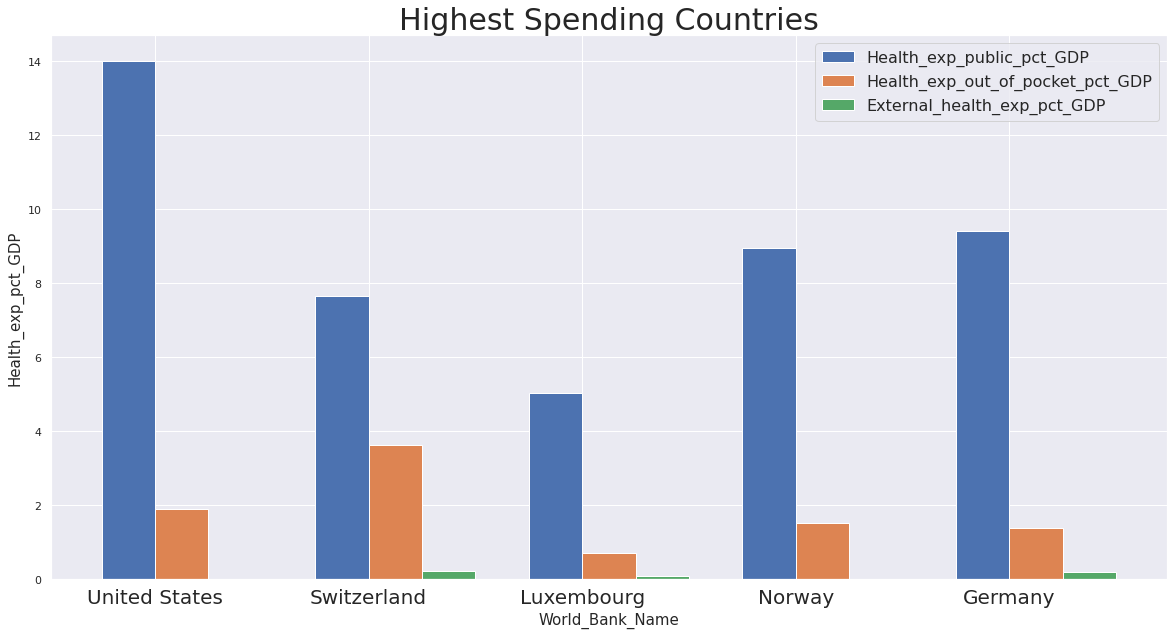

In [27]:
# NUMBER OF PAIRS OF BARS TO BE DISPLAYED
N = 5

# DATA ON X-AXIS

# SPECIFYING THE VALUES OF THE BLUE BARS (height)
blue_bar = Health_exp_pct_GDP['Health_exp_public_pct_GDP'].head()

# SPECIFYING THE VALUES OF THE ORANGE BARS (height)
orange_bar = Health_exp_pct_GDP['Health_exp_out_of_pocket_pct_GDP'].head()

# SPECIFYING THE VALUES OF THE GREEN BARS (height)
green_bar = Health_exp_pct_GDP['External_health_exp_pct_GDP'].head()

# POSITION OF THE BARS ON THE X-AXIS
ind = np.arange(N)

# FIGURE SIZE
plt.figure(figsize=(20,10))

# WIDTH OF A SINGLE BAR
width = 0.25       

# PLOTTING THE GRAPH
plt.bar(ind, blue_bar , width, label='Health_exp_public_pct_GDP')
plt.bar(ind + width, orange_bar, width, label='Health_exp_out_of_pocket_pct_GDP')
plt.bar(ind + width + width, green_bar, width, label='External_health_exp_pct_GDP')

plt.xlabel('World_Bank_Name', fontsize=15)
plt.ylabel('Health_exp_pct_GDP', fontsize=15)
plt.title('Highest Spending Countries', fontsize=30)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, per_capita_exp_PPP_2016['World_Bank_Name'].head(), fontsize=20)

#  FINDING THE BEST POSISTION OF THE LEGENDS AND PUTTING IT
plt.legend(loc='best', prop={'size': 16})
plt.show()

### Conclusions (Who spends on healthcare in Highest spending countries?)

Among the Highest spenders on Healthcare (per_capita_exp_PPP_2016), we note that 5 out of 5 have their health expenditures funded from domestic public sources (**Health_exp_public_pct_GDP**).

Followed by **Health_exp_out_of_pocket_pct_GDP**

There's little from the **External_health_exp_GDP**

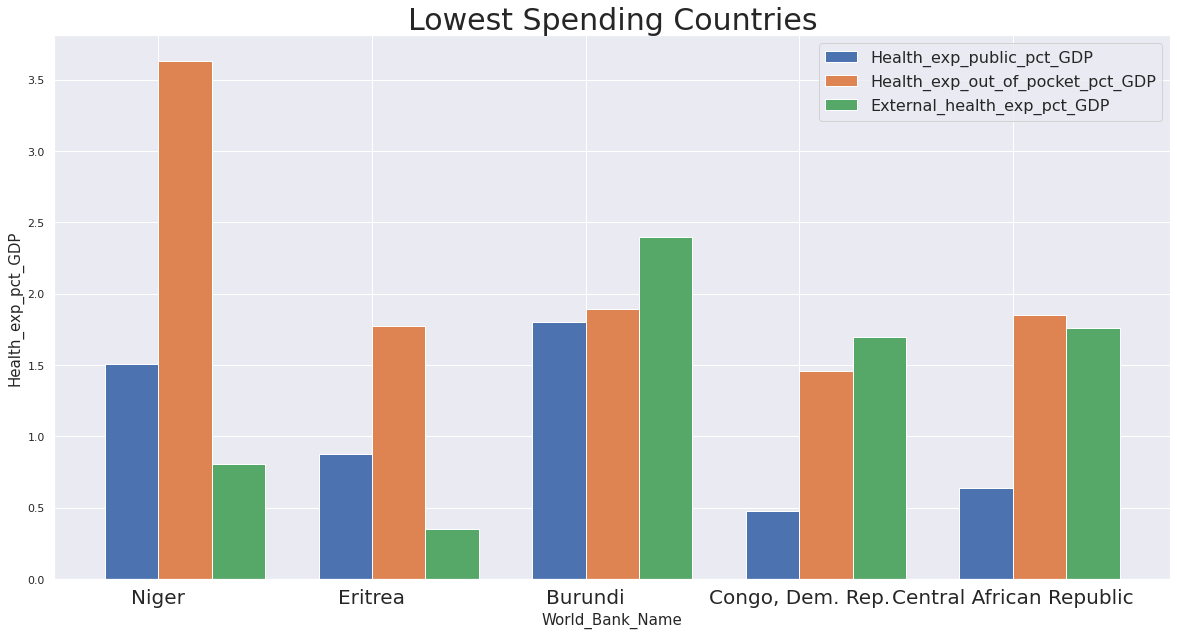

In [28]:
# NUMBER OF PAIRS OF BARS
N = 5

# DATA ON X-AXIS

# SPECIFYING THE VALUES OF BLUE BARS (height)
blue_bar = Health_exp_pct_GDP['Health_exp_public_pct_GDP'].tail()
# SPECIFYING THE VALUES OF ORANGE BARS (height)
orange_bar = Health_exp_pct_GDP['Health_exp_out_of_pocket_pct_GDP'].tail()
# SPECIFYING THE VALUES OF GREEN BARS (height)
green_bar = Health_exp_pct_GDP['External_health_exp_pct_GDP'].tail()

# POSITION OF BARS ON THE X-AXIS
ind = np.arange(N)

# FIGURE SIZE
plt.figure(figsize=(20,10))

# WIDTH OF A SINGLE BAR
width = 0.25       

# PLOTTING THE GRAPH
plt.bar(ind, blue_bar , width, label='Health_exp_public_pct_GDP')
plt.bar(ind + width, orange_bar, width, label='Health_exp_out_of_pocket_pct_GDP')
plt.bar(ind + width + width, green_bar, width, label='External_health_exp_pct_GDP')

plt.xlabel('World_Bank_Name', fontsize=15)
plt.ylabel('Health_exp_pct_GDP', fontsize=15)
plt.title('Lowest Spending Countries', fontsize=30)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, per_capita_exp_PPP_2016['World_Bank_Name'].tail(), fontsize=20)

# FINDING THE BEST POSITION FOR THE LEGENDS AND PLACING IT
plt.legend(loc='best', prop={'size': 16})
plt.show()

### Conclusions (Who spends on healthcare in Lowest spending countries?)

Among the Lowest spenders on Healthcare (per_capita_exp_PPP_2016), we note that 3 out of 5 have their health expenditures funded from **Health_exp_out_of_pocket_pct_GDP**.

Funding from **External_health_exp_GDP** follows closely. 

### General Conclusions

We therefore make an assumption that in high spending countries, health expenditures are mainly funded from domestic public sources (**Health_exp_public_pct_GDP**).

Whereas in low spending countries, health expenditures are mainly funded from **Health_exp_out_of_pocket_pct_GDP** and **External_health_exp_GDP**.

# KNN Modelling

# BY EDWARD MWEBI ORINA AND DAVID MOTAROKI OGARO

## Which column gives a better estimate of how much each country spends on health?

This could give us a target variable for use.

There were 14 columns in total initially but we dropped 4 (*Country_Region*, *Province_State*, *Health_exp_per_capita_USD_2016* and *Completeness_of_death_reg_2008-16*) due to nulls and correlation.

We are then left with 10 columns to choose from but the following columns do not give information on health expenditure of a country therefore we will not consider them:
- *World_Bank_Name*
- *Specialist_surgical_per_1000_2008-18* 
- *Physicians_per_1000_2009-18*
- *Completeness_of_birth_reg_2009-18*
- *Completeness_of_death_reg_2008-16*
- *Nurse_midwife_per_1000_2009-18*
  

We are now left with 4 columns. The following columns represent different aspects that make up the total health expenditure and together, they're able to give a better estimate of the total health expenditure. However, individually they may not be a good measure of a country's health expenditure therefore we will not consider them.
- *Health_exp_public_pct_2016*
- *Health_exp_out_of_pocket_pct_2016*
- *External_health_exp_pct_2016*

We're now left with 1 column, *per_capita_exp_PPP_2016*.

*per_capita_exp_PPP_2016* explains how much each citizen spends on health care (on average). PPP is a better measure than using GDP and a  single currency (e.g. USD) for comparison. This is because currencies can be manipulated.

### Represent *per_capita_exp_PPP_2016* column as a category 

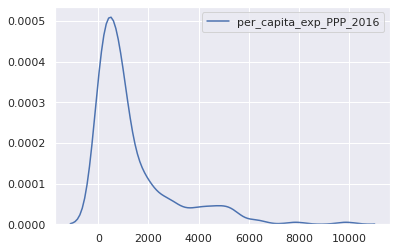

In [29]:
# CHECKING THE DISTRIBUTION
sns.kdeplot(health_data_df['per_capita_exp_PPP_2016'])

In [30]:
# MEASURES OF CENTRAL TENDENCY
print('Mean: ', health_data_df['per_capita_exp_PPP_2016'].mean())
print('Median: ', health_data_df['per_capita_exp_PPP_2016'].median())
print('Mode: ', health_data_df['per_capita_exp_PPP_2016'].mode()[0])

Mean:  1340.4704761904768
Median:  782.5
Mode:  782.5


The mean being greater than the median, means the graph will be positvely/right skewed.

We may use the median for categorization.

Create a column for spending category (high or low).

1 in the *spending category* means high spender whereas 0 means low spender.

In [31]:
# CATEGORIZATION BASED ON MEAN
def categorize_per_capita_exp_PPP_2016(row):
    if row > 782.5:
        row = 1
    else:
        row = 0
    return row

# CREATING A COLUMN FOR THE SPENDING CATEGORY WHICH WILL BE EQUITTED TO EITHER HIGH OR LOW
health_data_df['Spending_category'] = health_data_df['per_capita_exp_PPP_2016'].apply(categorize_per_capita_exp_PPP_2016)

# WE DROP THE per_capita_exp_PPP_2016 COLUMN 
health_data_df.drop('per_capita_exp_PPP_2016', axis=1, inplace=True)
health_data_df.head()

,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Spending_category
0,Afghanistan,10.2,5.1,77.4,17.5,0.3,0.3,0.0,42.3,0
1,Albania,6.7,41.4,58.0,0.7,1.2,3.6,11.6,98.4,0
2,Algeria,6.6,67.7,30.9,0.0,1.8,2.2,12.1,100.0,1
3,Andorra,10.4,49.1,41.7,1.7,3.3,4.0,83.1,100.0,1
4,Angola,2.9,44.1,35.2,3.6,0.2,1.3,23.6,25.0,0


In [32]:
# SHAPE OF THE DATASET AFTER THE CHANGES
health_data_df.shape

(210, 10)

In [33]:
# WE ALSO DROP World_Bank_Name SINCE WE DON'T NEED IT
health_data_df.drop('World_Bank_Name', axis=1, inplace=True)
health_data_df.head()

,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Spending_category
0,10.2,5.1,77.4,17.5,0.3,0.3,0.0,42.3,0
1,6.7,41.4,58.0,0.7,1.2,3.6,11.6,98.4,0
2,6.6,67.7,30.9,0.0,1.8,2.2,12.1,100.0,1
3,10.4,49.1,41.7,1.7,3.3,4.0,83.1,100.0,1
4,2.9,44.1,35.2,3.6,0.2,1.3,23.6,25.0,0


In [34]:
# SHAPE OF THE DATASET AFTER THE CHANGES
health_data_df.shape

(210, 9)

In [35]:
# WE THEN GET THE DEPENDENT AND INDEPENDENT VARIABLES
y = health_data_df['Spending_category']
print(y[:5])
X = health_data_df.drop('Spending_category', axis=1)
X.head()

0    0
1    0
2    1
3    1
4    0
Name: Spending_category, dtype: int64


,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18
0,10.2,5.1,77.4,17.5,0.3,0.3,0.0,42.3
1,6.7,41.4,58.0,0.7,1.2,3.6,11.6,98.4
2,6.6,67.7,30.9,0.0,1.8,2.2,12.1,100.0
3,10.4,49.1,41.7,1.7,3.3,4.0,83.1,100.0
4,2.9,44.1,35.2,3.6,0.2,1.3,23.6,25.0


In [36]:
# WE CAN NOW SPLIT OUR DATASET INTO TWO: TRAIN SET AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=99, stratify=y)

### Normalizing and scaling the data

This is because most machine learning models assume the features are on the same scale and are normally distributed. Tree based models are however an exception.

We'll fit the transformer on train data then use it to transform both the train and test data. This helps avoid the train test contamination which may be caused by fitting the transformer on all the data.

In [37]:
# INSTANTIATING THE POWERTRANSFORMER
pow_trans = PowerTransformer()

# TRAINING THE TRANSFORM ON THE X TRAINING DATA
pow_trans.fit(X_train)

# APPLYING THE POWER TRANSFORM TO THE X TRAIN AND X TEST DATA
X_train_normalized = pow_trans.transform(X_train)
X_test_normalized = pow_trans.transform(X_test)

# GET THE NORMALIZED DATAFRAMES
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns, index=X_train.index)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_test.columns, index=X_test.index)

### Creating the base model

In [38]:
# CREATING A K-NN CLASSIFIER
knn = KNeighborsClassifier()

# PANDAS DATAFRAME TO STORE THE TRAIN AND TEST SCORES
scores_df = pd.DataFrame(columns=['Train score', 'Test score'], index=['KNeighborsClassifier'])

train_scores = []
test_scores = []

# DEFINING THE FUNCTION TO CALCULATE THE TRAIN AND TEST SCORES
def get_scores(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    model.fit(X_train, y_train)

    # COMPUTING THE ACCURACY ON THE TRAINING SET
    train_scores.append(model.score(X_train, y_train))

    # COMPUTING THE ACCURACY ON THE TEST SET
    test_scores.append(model.score(X_test, y_test))
    scores_df['Train score'] = train_scores
    scores_df['Test score'] = test_scores

    # EMPTYING THE LISTS SINCE WE'LL REUSE THEM
    train_scores.clear()
    test_scores.clear()
    return scores_df

get_scores(knn, X_train_normalized, X_test_normalized)

,Train score,Test score
KNeighborsClassifier,0.916667,0.880952


### Cross validation

Evaluating our model's true performance, we perform cross validation.

In [39]:
# TRAINING THE TRANSFORM ON THE X DATA
pow_trans.fit(X)

# APPLYING THE POWER TRANSFORM TO THE X DATA
X_normalized = pow_trans.transform(X)

# GETTING THE NORMALIZED DATAFRAMES
X_normalized = pd.DataFrame(X_normalized, columns=X.columns, index=X.index)

# CROSS VALIDATION
cv_scores = cross_val_score(knn, X_normalized, y, cv=5)
cv_scores.mean()

0.8333333333333334

We notice that the score reduces. 

Relying on our previous scores would have thus been misleading.

Let's try to improve on the cross validated score.

### Hyperparameter Tuning

Let's try to get the best values for the model's hyperparameters e.g. n_neighbors

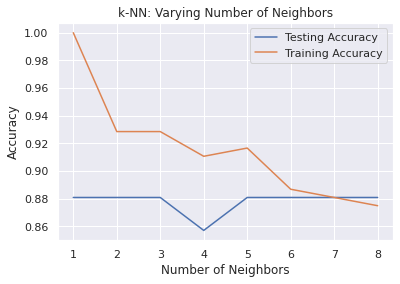

In [40]:
# Setting up arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Looping over different values of k
for i, k in enumerate(neighbors):

    # Setting up a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fitting the classifier to the training data
    knn.fit(X_train_normalized, y_train)
    
    #Computing accuracy on the training set
    train_accuracy[i] = knn.score(X_train_normalized, y_train)

    #Computing accuracy on the testing set
    test_accuracy[i] = knn.score(X_test_normalized, y_test)

# Generating the plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

The best value for the model's *n_neighbors* hyperparameter is 8 (test accuracy).

We therefore re-initialize the model with the best value for the *n_neighbors* hyperparameter.

In [41]:
# cross validating the tuned model
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=8), X_normalized, y, cv=5)
cv_scores.mean()

0.8476190476190476

The model's cross validated accuracy increases.

### Evaluate model's performance


Drawing a confusion matrix for our model to get a better understanding of your model's performance.

In [42]:
# Instantiating a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors = 8)

# Fitting the classifier to the training data
knn.fit(X_train_normalized, y_train)

# Predicting the labels of the test data: y_pred
y_pred = knn.predict(X_test_normalized)

# Generating the confusion matrix 
print(confusion_matrix(y_test, y_pred))

# Generating the classification report
print('\n', classification_report(y_test, y_pred))

[[22  1]
 [ 4 15]]

               precision    recall  f1-score   support

           0       0.85      0.96      0.90        23
           1       0.94      0.79      0.86        19

    accuracy                           0.88        42
   macro avg       0.89      0.87      0.88        42
weighted avg       0.89      0.88      0.88        42



1. Our recall is 0.96, which is good. That means we predicted most high spending countries correctly.

2. Our precision is 0.85, which is not so good. Means we predicted some low spending countries to be high spenders.